# 
We will use the data from this competition https://www.drivendata.org/competitions/1/united-nations-millennium-development-goals/.

1. Load the data from the competition, removing any possible meaningless column.
2. The "Series Code" column contains codes with segments separated by periods ".". Suppose that the first segment represents some global "category". How many unique categories are?
3. Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns. Write another similar function that receives a series name and returns the countries.
4. Plot the "Alternative and nuclear energy (% of total energy use)" of your three countries in the same plot, as well as a centered, 3 year rolling mean.
5. Which are the 8 countries with the largest "Electricity production from coal sources (kWh)"? Plot the series for those 8 countries.
6. Among the countries that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset, which are the 8 ones that had the biggest percentual increase in those last 5 years? Plot the series for those 8 countries.
7. Pick some health or development indicators of your choice. "Is the world doing better or worse?". Discuss, compare different countries and/or continents, correlate with other indexes.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv ('/Users/Anastasia/bts-mbds-data-science-foundations/TrainingSet.csv').dropna().drop(["Unnamed: 0"], axis = 1)
df.head()

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
20,2.257446e+06,2.577942e+06,3.328705e+06,4.087907e+06,4.086801e+06,5.291039e+06,5.175389e+06,5.883546e+06,5.102752e+06,6.364148e+06,...,4.539497e+06,2.598783e+06,4.355656e+06,5.699296e+06,8.245873e+06,1.133449e+07,1.753380e+07,Afghanistan,NY.ADJ.DCO2.CD,Adjusted savings: carbon dioxide damage (curre...
26,2.233065e+07,2.654146e+07,6.606462e+07,6.882184e+07,6.463635e+07,7.252207e+07,8.584604e+07,1.121651e+08,1.638508e+08,1.732730e+08,...,1.205094e+06,9.835384e+04,2.049705e+05,6.564596e+05,4.838278e+05,5.607931e+05,5.495978e+06,Afghanistan,NY.ADJ.DNGY.CD,Adjusted savings: energy depletion (current US$)
28,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Afghanistan,NY.ADJ.DMIN.CD,Adjusted savings: mineral depletion (current US$)
31,3.633483e+07,3.876103e+07,4.837836e+07,6.899526e+07,7.809190e+07,8.131705e+07,8.492192e+07,1.126985e+08,1.245812e+08,8.876818e+07,...,6.499022e+07,9.221123e+07,1.002298e+08,8.858682e+07,8.862863e+07,1.330467e+08,1.851871e+08,Afghanistan,NY.ADJ.DFOR.CD,Adjusted savings: net forest depletion (curren...
34,1.496240e+02,1.505446e+02,1.514652e+02,1.523858e+02,1.533064e+02,1.542270e+02,1.553466e+02,1.564662e+02,1.575858e+02,1.587054e+02,...,1.544154e+02,1.505050e+02,1.438986e+02,1.372922e+02,1.306858e+02,1.240794e+02,1.174730e+02,Afghanistan,SP.ADO.TFRT,"Adolescent fertility rate (births per 1,000 wo..."


In [5]:

df['Series Code'].str[0:2].value_counts()

DT    17039
NY     7116
NE     5512
SP     5237
EN     3420
EG     2813
AG     2461
NV     1672
TX     1444
TM     1415
SE     1272
FM     1213
IS     1005
DC      785
BX      521
PA      299
SH      294
FI      286
FS      276
FP      220
4.      147
IP      137
TG      115
FD       89
MS       51
FR       45
BM       15
2.        2
PX        1
Name: Series Code, dtype: int64

In [6]:
df['Series Code'].str[0:2].describe()

count     54902
unique       29
top          DT
freq      17039
Name: Series Code, dtype: object

In [7]:
#df.pivot(index='Country Name', columns='Series Code').head()
#pd.melt(df, id_vars=['Country Name', 'Series Code'], var_name='Year').sort_values(['Country Name', 'Year'])

In [127]:
#df[df['Country Name'] == 'Australia'].pivot(index='Country Name', columns='Series Code')

def series_country(country):
    df1 = df[df['Country Name'] == country].set_index(['Series Code']).T
    df1.index = df1.index.str[0:5].astype(str)
    df1.index.name = 'Year'
    return df1

In [128]:
series_country("Australia")

Series Code,NY.ADJ.NNTY.KD.ZG,NY.ADJ.NNTY.KD,NY.ADJ.NNTY.CD,NY.ADJ.NNTY.PC.KD.ZG,NY.ADJ.NNTY.PC.KD,NY.ADJ.NNTY.PC.CD,NY.ADJ.SVNX.GN.ZS,NY.ADJ.SVNX.CD,NY.ADJ.DCO2.GN.ZS,NY.ADJ.DCO2.CD,...,NY.TTF.GNFS.KN,NY.GDP.TOTL.RT.ZS,FI.RES.TOTL.CD,FI.RES.XGLD.CD,NE.TRD.GNFS.ZS,IP.TMK.TOTL,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SP.URB.GROW,FP.WPI.TOTL
Year,,,,,,,,,,,,,,,,,,,,,
1972,5.70532,2.08129e+11,4.27464e+10,3.78006,15794.9,3244.02,17.5921,9.13328e+09,0.446749,2.31939e+08,...,-2.28014e+10,2.1825,6.33977e+09,5.85951e+09,24.8193,9204,1.12699e+07,85.5274,1.99166,13.4414
1973,5.37159,2.19309e+11,5.26114e+10,3.7729,16390.8,3932.09,17.9849,1.15094e+10,0.420229,2.68925e+08,...,-1.83193e+10,2.9862,6.21382e+09,5.38642e+09,25.1998,10026,1.14611e+07,85.6586,1.68211,14.6032
1974,2.64034,2.25099e+11,7.27916e+10,0.0748926,16403.1,5304.35,16.5049,1.46594e+10,0.336813,2.99151e+08,...,-1.50377e+10,4.24791,5.32903e+09,3.95304e+09,26.3772,9209,1.17729e+07,85.7898,2.68426,16.8359
1975,0.784712,2.26865e+11,8.0096e+10,-0.448527,16329.5,5765.2,12.9303,1.26245e+10,0.346245,3.38056e+08,...,-1.95963e+10,4.06867,3.98982e+09,2.95477e+09,29.0158,9046,1.1937e+07,85.921,1.38401,19.3716
1976,2.40162,2.32314e+11,8.63855e+10,1.38001,16554.8,6155.88,13.0464,1.37246e+10,0.340583,3.58289e+08,...,-2.18477e+10,4.45941,3.8621e+09,2.8698e+09,26.9045,10195,1.20528e+07,85.8888,0.965168,21.5639
1977,1.13914,2.3496e+11,8.92716e+10,0.00603185,16555.8,6290.27,11.4863,1.26037e+10,0.37873,4.15574e+08,...,-2.44657e+10,4.72994,3.31931e+09,2.0576e+09,28.6711,10888,1.21848e+07,85.8566,1.08918,23.7561
1978,0.353743,2.35791e+11,9.61898e+10,-0.806496,16422.3,6699.39,10.2567,1.20239e+10,0.412917,4.84061e+08,...,-2.79807e+10,4.089,3.82237e+09,2.0616e+09,28.219,11001,1.23227e+07,85.8244,1.12537,25.711
1979,1.31949,2.38903e+11,1.06825e+11,0.230487,16460.2,7360.16,10.1589,1.35601e+10,0.403432,5.38503e+08,...,-2.9749e+10,6.41184,5.48601e+09,1.42432e+09,29.6742,16127,1.24519e+07,85.7922,1.04312,29.5095
1980,3.71146,2.4777e+11,1.18507e+11,2.45495,16864.2,8066.08,10.6584,1.58477e+10,0.430402,6.39949e+08,...,-3.05894e+10,6.87208,6.36646e+09,1.68996e+09,32.3486,13567,1.25999e+07,85.76,1.1814,33.6465


In [108]:
#df1 = df.loc[(df['Country Name'] == 'Australia')  & (df['Series Name']=="Alternative and nuclear energy (% of total energy use)")].T
def series_country_ch(country1, country2, country3, series_name):
    df1 = df.loc[((df['Country Name'] == country1)|(df['Country Name'] == country2)|(df['Country Name'] == country3)) & (df['Series Name']==series_name)].set_index(['Series Code']).T
    df1.index = df1.index.str[0:5].astype(str)
    df1.index.name = 'Year'
    return df1


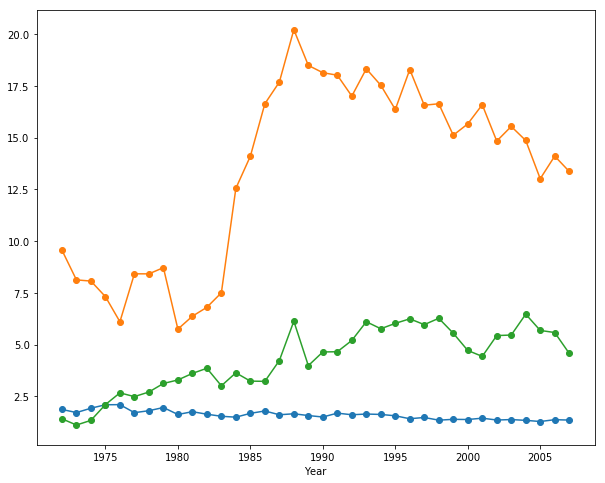

In [123]:
df2 = series_country_ch("Australia", "Turkey", "Spain", "Alternative and nuclear energy (% of total energy use)" )


df2.drop(df2.tail(2).index,inplace=True)
df2.index = df2.index.astype(int)

df2.plot(legend = False, figsize = (10,8), style="-o");



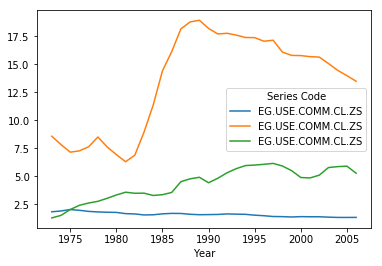

In [122]:
df2.rolling(center = True, window = 3).mean().plot();